In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, art3d
from sympy import Matrix
import matplotlib.animation as animation

from car import Car
from tools_cv import *
from tools_kinematics import rotation, add_translation

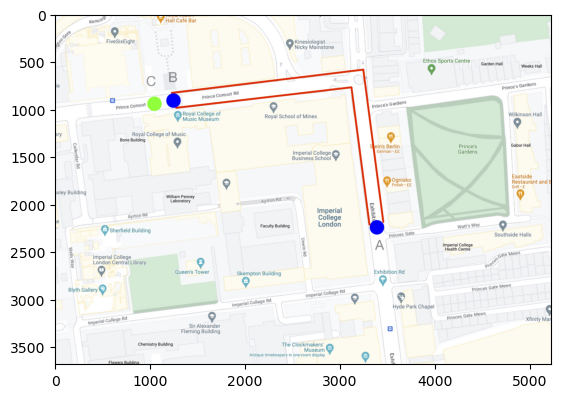

In [2]:
%matplotlib inline
img = cv2.imread('CWMap.jpg')  # BGR
show_img(img)

In [3]:
img_R = extract_color(img, 'R')
img_G = extract_color(img, 'G')
img_B = extract_color(img, 'B')

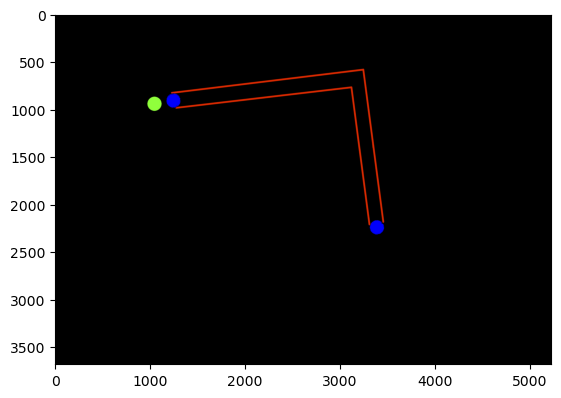

In [4]:
# show_img(img_R)
# show_img(img_G)
# show_img(img_B)
show_img(img_R + img_G + img_B)

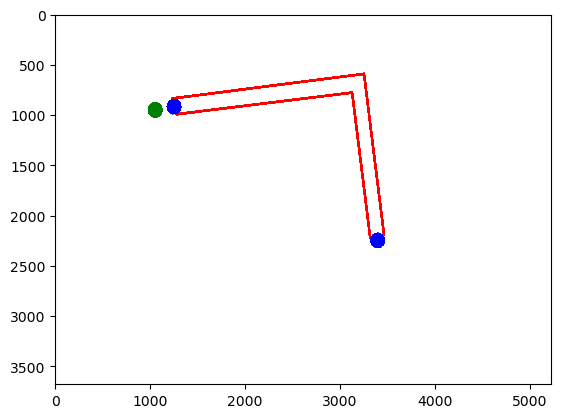

In [5]:
R_coords = mask2xy(img_R)
G_coords = mask2xy(img_G)
B_coords = mask2xy(img_B)

plt.scatter(R_coords[:, 0], R_coords[:, 1], c='r', s=0.1, linewidth=0.1)
plt.scatter(G_coords[:, 0], G_coords[:, 1], c='g', s=0.1, linewidth=0.1)
plt.scatter(B_coords[:, 0], B_coords[:, 1], c='b', s=0.1, linewidth=0.1)
plt.xlim([0, img.shape[1]])
plt.ylim([img.shape[0], 0])
plt.show()

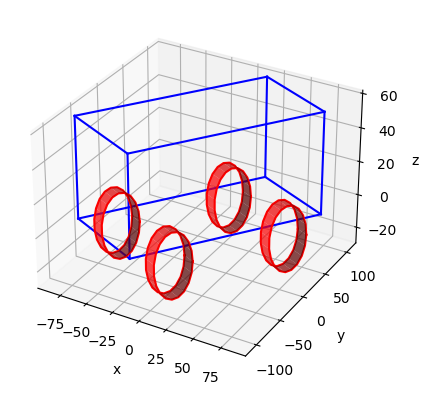

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

mycar = Car(length=5*40, width=2*40, height=1.5*40,
            wheel_radius=0.5*40, wheel_width=0.3*40,
            wheel_offset=0.2*40, wheel_base=3*40)
R = rotation(np.pi/3, 'z')
T = add_translation(R)
mycar.update_plot(ax, T)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.set_xlim([-3, 3])
# ax.set_ylim([-3, 3])
# ax.set_zlim([-2, 2])

plt.show()

<IPython.core.display.Javascript object>


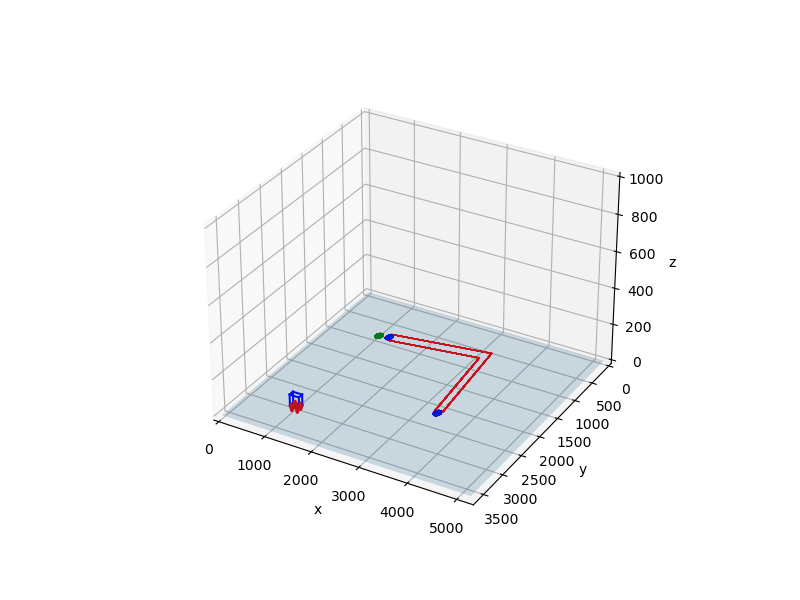

In [10]:
%matplotlib inline
fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim([0, img.shape[1]])
ax.set_ylim([img.shape[0], 0])
ax.set_zlim([0, 1000])

ax.scatter(R_coords[:, 0], R_coords[:, 1], 0, c='r', s=0.1, linewidth=0.1)
ax.scatter(G_coords[:, 0], G_coords[:, 1], 0, c='g', s=0.1, linewidth=0.1)
ax.scatter(B_coords[:, 0], B_coords[:, 1], 0, c='b', s=0.1, linewidth=0.1)

x, y = np.meshgrid(np.linspace(0, img.shape[1], 1000), np.linspace(0, img.shape[0], 1000))
z = np.zeros_like(x)
ax.plot_surface(x, y, z, alpha=0.2)

# draw the car:

scalr = 40
mycar = Car(length=5*scalr, width=2*scalr, height=1.5*scalr,
            wheel_radius=0.5*scalr, wheel_width=0.3*scalr,
            wheel_offset=0.2*scalr, wheel_base=3*scalr)
R = rotation(np.pi, 'z')
T = add_translation(R, Matrix([1000, 3000, 0, 1]))
mycar.update_plot(ax, T)

plt.show()

<IPython.core.display.Javascript object>


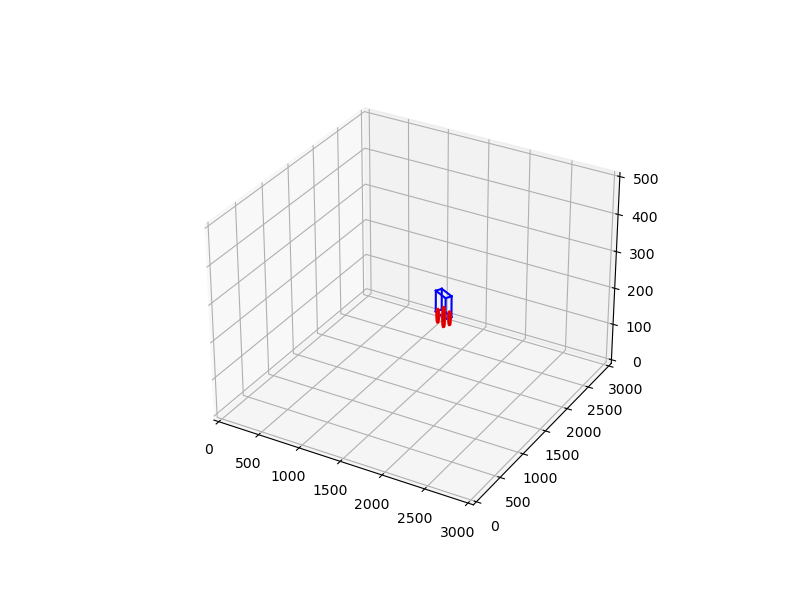

In [16]:

%matplotlib notebook

plt.ion()

fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim([0, 3000])
ax.set_ylim([0, 3000])
ax.set_zlim([0, 500])
# ax.set_xlim([0, img.shape[1]])
# ax.set_ylim([img.shape[0], 0])
# ax.set_zlim([0, 1000])

ax.scatter(R_coords[:, 0], R_coords[:, 1], 0, c='r', s=0.1, linewidth=0.1)
ax.scatter(G_coords[:, 0], G_coords[:, 1], 0, c='g', s=0.1, linewidth=0.1)
ax.scatter(B_coords[:, 0], B_coords[:, 1], 0, c='b', s=0.1, linewidth=0.1)

x, y = np.meshgrid(np.linspace(0, img.shape[1], 1000), np.linspace(0, img.shape[0], 1000))
z = np.zeros_like(x)
ax.plot_surface(x, y, z, alpha=0.2)

# draw the car:
scalr = 40
mycar = Car(length=5*scalr, width=2*scalr, height=1.5*scalr,
            wheel_radius=0.5*scalr, wheel_width=0.3*scalr,
            wheel_offset=0.2*scalr, wheel_base=3*scalr)

for i in range(100):
    ax.cla()
    R = rotation(-np.pi - i/10, 'z')
    T = add_translation(R, Matrix([i*10, 3000, 0, 1]))
    mycar.update_plot(ax, T)
    ax.set_xlim([0, 3000])
    ax.set_ylim([0, 3000])
    ax.set_zlim([0, 500])
    fig.canvas.draw()
    fig.canvas.flush_events()
    
plt.show()

<IPython.core.display.Javascript object>


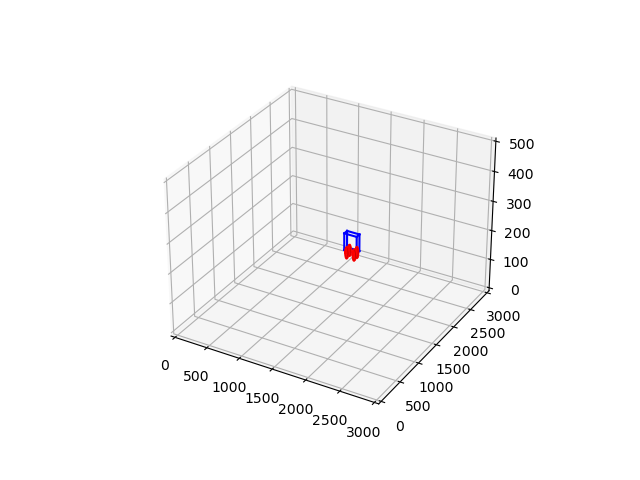

In [13]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

mycar = Car(length=5*40, width=2*40, height=1.5*40,
            wheel_radius=0.5*40, wheel_width=0.3*40,
            wheel_offset=0.2*40, wheel_base=3*40)
R = rotation(np.pi/3, 'z')
T = add_translation(R)
mycar.update_plot(ax, T)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


def update(frame, ax):
    ax.cla()
    R = rotation(np.pi, 'z')
    T = add_translation(R, Matrix([frame*10, 3000, 0, 1]))
    mycar.update_plot(ax, T)
    ax.set_xlim([0, 3000])
    ax.set_ylim([0, 3000])
    ax.set_zlim([0, 500])

    
ani = animation.FuncAnimation(fig, update, fargs=(ax,), frames=np.arange(0, 100), interval=10, repeat=False)

plt.show()